In [1]:
import numpy as np
from scipy import signal

# basic setup for the experiment
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

signal_1 = np.sin(2 * time)                    # sinusoidal signal
signal_2 = np.sign(np.sin(3 * time))           # square signal
signal_3 = signal.sawtooth(2 * np.pi * time)   # saw tooth signal

# add noise to the data
signals = np.c_[signal_1, signal_2, signal_3]
signals += 0.2 * np.random.normal(size=signals.shape)

# standardize data
signals /= signals.std(axis=0)

# mix data using a matrix
mixing_matrix = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])
observations = np.dot(signals, mixing_matrix.T)

In [2]:
from sklearn.decomposition import FastICA

# reconstruct the signal using ica
ica = FastICA(n_components=3)
reconstructed_signals = ica.fit_transform(observations)
mixing_matrix_estimation = ica.mixing_

mixing_matrix

array([[1. , 1. , 1. ],
       [0.5, 2. , 1. ],
       [1.5, 1. , 2. ]])

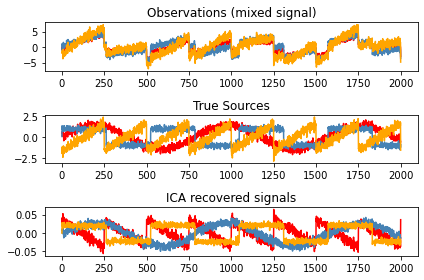

In [3]:
import matplotlib.pyplot as plt

plt.figure()

models = [observations, signals, reconstructed_signals]
names = [
    "Observations (mixed signal)",
    "True Sources",
    "ICA recovered signals",
]

colors = ["red", "steelblue", "orange"]

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(3, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()